In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import json
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
!pip install ekphrasis
!pip install tweet-preprocessor
from nltk.stem import PorterStemmer
import preprocessor as p

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.4 MB/s eta 0:00:00


In [3]:
tweets = pd.read_csv("/content/drive/MyDrive/NLP RES DATASET/labeled_dataHSOLemotion.csv")

In [4]:
tweets.shape

(24783, 7)

In [5]:
tweets.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,emotion,tweet
0,0,3,0,0,3,0.0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1.0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1.0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,0.0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1.0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
import re

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    ps =PorterStemmer()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub("rt"," ", temp)
    temp = re.sub("like"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords.words('english')]
    temp = " ".join(ps.stem(word) for word in temp)
    return temp

In [7]:
from nltk.corpus import stopwords

In [8]:
tweets["text"] = [clean_tweet(tw) for tw in tweets["tweet"]]

<ipython-input-6-abd05791609f>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [9]:
tweets.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,emotion,tweet,text
0,0,3,0,0,3,0.0,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain clean hous amp man alw...
1,1,3,0,3,0,1.0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe 1st p...
2,2,3,0,3,0,1.0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch sta cri confus shit
3,3,3,0,2,1,0.0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look tranni
4,4,6,0,6,0,1.0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


In [10]:
def freqWord(data):
    from collections import Counter
    # split() returns list of all the words in the string

    data_set = ' '.join([str(elem) for i,elem in enumerate(data)])
    split_it = data_set.split()

    # Pass the split_it list to instance of Counter class.
    Counter = Counter(split_it)

    # most_common() produces k frequently encountered
    # input values and their respective counts.
    most_occur = Counter.most_common(5)

    return most_occur

#freqWord(tweets["text"][tweets["neith"] > 0.50])

## Pointwise Mutual Information

In [11]:
tweets["emotion"][tweets.emotion == 3 ] = 2

<ipython-input-11-3cf2187e182d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["emotion"][tweets.emotion == 3 ] = 2


In [12]:
emo = ["Clean","Abusive","Hate Crime"]

In [13]:
emo[0]


'Clean'

In [14]:

  tweets["emotion"][tweets.emotion == 0 ] = "Clean"
  tweets["emotion"][tweets.emotion == 1 ] = "Abusive"
  tweets["emotion"][tweets.emotion == 2 ] = "Hate Crime"

<ipython-input-14-abb9399c971b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["emotion"][tweets.emotion == 0 ] = "Clean"


In [15]:
for i in range (0,3):
  tweets["emotion"][tweets.emotion == i ] = emo[i]

In [16]:
df2 = tweets.groupby(['emotion'])['emotion'].count()

In [17]:
df2

emotion
Abusive       14347
Clean          5891
Hate Crime     4543
Name: emotion, dtype: int64

<Axes: ylabel='emotion'>

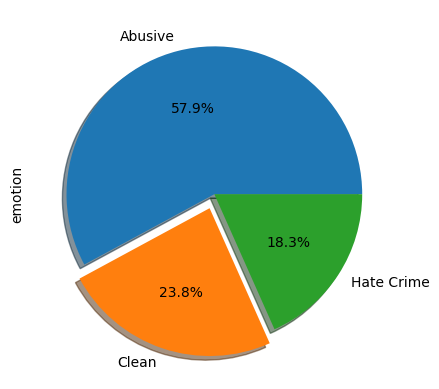

In [18]:
df2.plot.pie(y='emotion', \
                   autopct='%1.1f%%', explode=(0, 0.1, 0), \
                   shadow=True, startangle=0)

In [19]:
df = tweets

In [20]:
df['neith'] = np.where(df['count'] < 1, df['neither'], df['neither']/df['count'])

In [21]:
df['offen'] = np.where(df['count'] < 1, df['neither'], df['offensive_language']/df['count'])
df['hates'] = np.where(df['count'] < 1, df['neither'], df['hate_speech']/df['count'])

In [22]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,emotion,tweet,text,neith,offen,hates
0,0,3,0,0,3,Clean,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain clean hous amp man alw...,1.000000,0.000000,0.0
1,1,3,0,3,0,Abusive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe 1st p...,0.000000,1.000000,0.0
2,2,3,0,3,0,Abusive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch sta cri confus shit,0.000000,1.000000,0.0
3,3,3,0,2,1,Clean,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look tranni,0.333333,0.666667,0.0
4,4,6,0,6,0,Abusive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya,0.000000,1.000000,0.0


In [23]:

freqWord(df["text"][df["neith"] > 0.50])

[('trash', 689), ('bird', 470), ('charli', 264), ('im', 220), ('yellow', 219)]

In [24]:

freqWord(df["text"][df["hates"] > 0.5])

[('bitch', 269),
 ('faggot', 241),
 ('fuck', 222),
 ('nigga', 215),
 ('nigger', 168)]

In [25]:

freqWord(df["text"][df["offen"] > 0.50])[0][1]

11171

In [26]:
hatelen = df["text"][df["hates"]>0.5].shape[0]

In [27]:
offLen = df["text"][df["offen"] > 0.50].shape[0]

In [28]:
clen = df.shape[0] - offLen - hatelen

In [29]:
def wordListToFreqDict(data, p):
    wordlist = ' '.join([str(elem) for i,elem in enumerate(data)])
    return wordlist.count(p)

In [30]:
print("PMI For most frequent words that indicate Hate Crime")
for tup in freqWord(df["text"][df["hates"] > 0.5]):
  total_count = wordListToFreqDict(df["text"],tup[0])
  cnt = tup[1]
  pmi = cnt/(total_count*hatelen)
  #re.sub(rf'[aeiou]', "*", tup[0])
  print(re.sub(rf'[aeiou]', "*", tup[0]),": ","%.2f" %(pmi*100000)," e-6")

PMI For most frequent words that indicate Hate Crime
b*tch :  1.65  e-6
f*gg*t :  32.47  e-6
f*ck :  5.86  e-6
n*gg* :  6.31  e-6
n*gg*r :  35.91  e-6


In [31]:
print("PMI For most frequent words that indicate Abuse")
for tup in freqWord(df["text"][df["offen"] > 0.5]):
  total_count = wordListToFreqDict(df["text"],tup[0])
  cnt = tup[1]
  pmi = cnt/(total_count*offLen)
  print(re.sub(rf'[aeiou]', "*", tup[0]),": ","%.2f" %(pmi*100000)," e-6")

PMI For most frequent words that indicate Abuse
b*tch :  5.08  e-6
h** :  4.97  e-6
p*ss* :  5.08  e-6
f*ck :  4.01  e-6
n*gg* :  3.92  e-6


In [32]:
import nltk
from nltk.stem import WordNetLemmatizer

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()


In [33]:
def lemma(sentence):
  word_list = nltk.word_tokenize(sentence)
  lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
  return lemmatized_output

In [34]:
df["lemmatised"] = df["text"].apply(lemma)

In [35]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,emotion,tweet,text,neith,offen,hates,lemmatised
0,0,3,0,0,3,Clean,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain clean hous amp man alw...,1.000000,0.000000,0.0,woman shouldnt complain clean hous amp man alw...
1,1,3,0,3,0,Abusive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe 1st p...,0.000000,1.000000,0.0,boy dat cold tyga dwn bad cuffin dat hoe 1st p...
2,2,3,0,3,0,Abusive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch sta cri confus shit,0.000000,1.000000,0.0,dawg ever fuck bitch sta cri confus shit
3,3,3,0,2,1,Clean,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look tranni,0.333333,0.666667,0.0,look tranni
4,4,6,0,6,0,Abusive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya,0.000000,1.000000,0.0,shit hear might true might faker bitch told ya


In [36]:
def freqWordfull(data):
    from collections import Counter
    # split() returns list of all the words in the string

    data_set = ' '.join([str(elem) for i,elem in enumerate(data)])
    split_it = data_set.split()

    # Pass the split_it list to instance of Counter class.
    Counter = Counter(split_it)

    # most_common() produces k frequently encountered
    # input values and their respective counts.
    most_occur = Counter.most_common(50)

    return most_occur

In [37]:
word = freqWordfull(df['lemmatised'])
print(word)

allwords = []

for tup in word:
  allwords.append(tup[0])

[('bitch', 11453), ('hoe', 4341), ('fuck', 2269), ('pussi', 2251), ('im', 2090), ('nigga', 2017), ('get', 1781), ('dont', 1766), ('got', 1612), ('as', 1595), ('u', 1485), ('shit', 1310), ('trash', 1161), ('aint', 1161), ('lol', 1100), ('amp', 931), ('go', 912), ('know', 884), ('look', 772), ('love', 771), ('one', 761), ('want', 753), ('make', 713), ('girl', 699), ('say', 688), ('cant', 665), ('yall', 659), ('na', 655), ('call', 628), ('that', 621), ('yo', 612), ('talk', 603), ('bird', 600), ('man', 577), ('bad', 572), ('your', 562), ('think', 558), ('need', 546), ('good', 539), ('hate', 538), ('faggot', 522), ('see', 515), ('time', 497), ('ya', 482), ('still', 479), ('back', 473), ('let', 469), ('day', 457), ('never', 447), ('come', 446)]


In [38]:
print(allwords)

['bitch', 'hoe', 'fuck', 'pussi', 'im', 'nigga', 'get', 'dont', 'got', 'as', 'u', 'shit', 'trash', 'aint', 'lol', 'amp', 'go', 'know', 'look', 'love', 'one', 'want', 'make', 'girl', 'say', 'cant', 'yall', 'na', 'call', 'that', 'yo', 'talk', 'bird', 'man', 'bad', 'your', 'think', 'need', 'good', 'hate', 'faggot', 'see', 'time', 'ya', 'still', 'back', 'let', 'day', 'never', 'come']


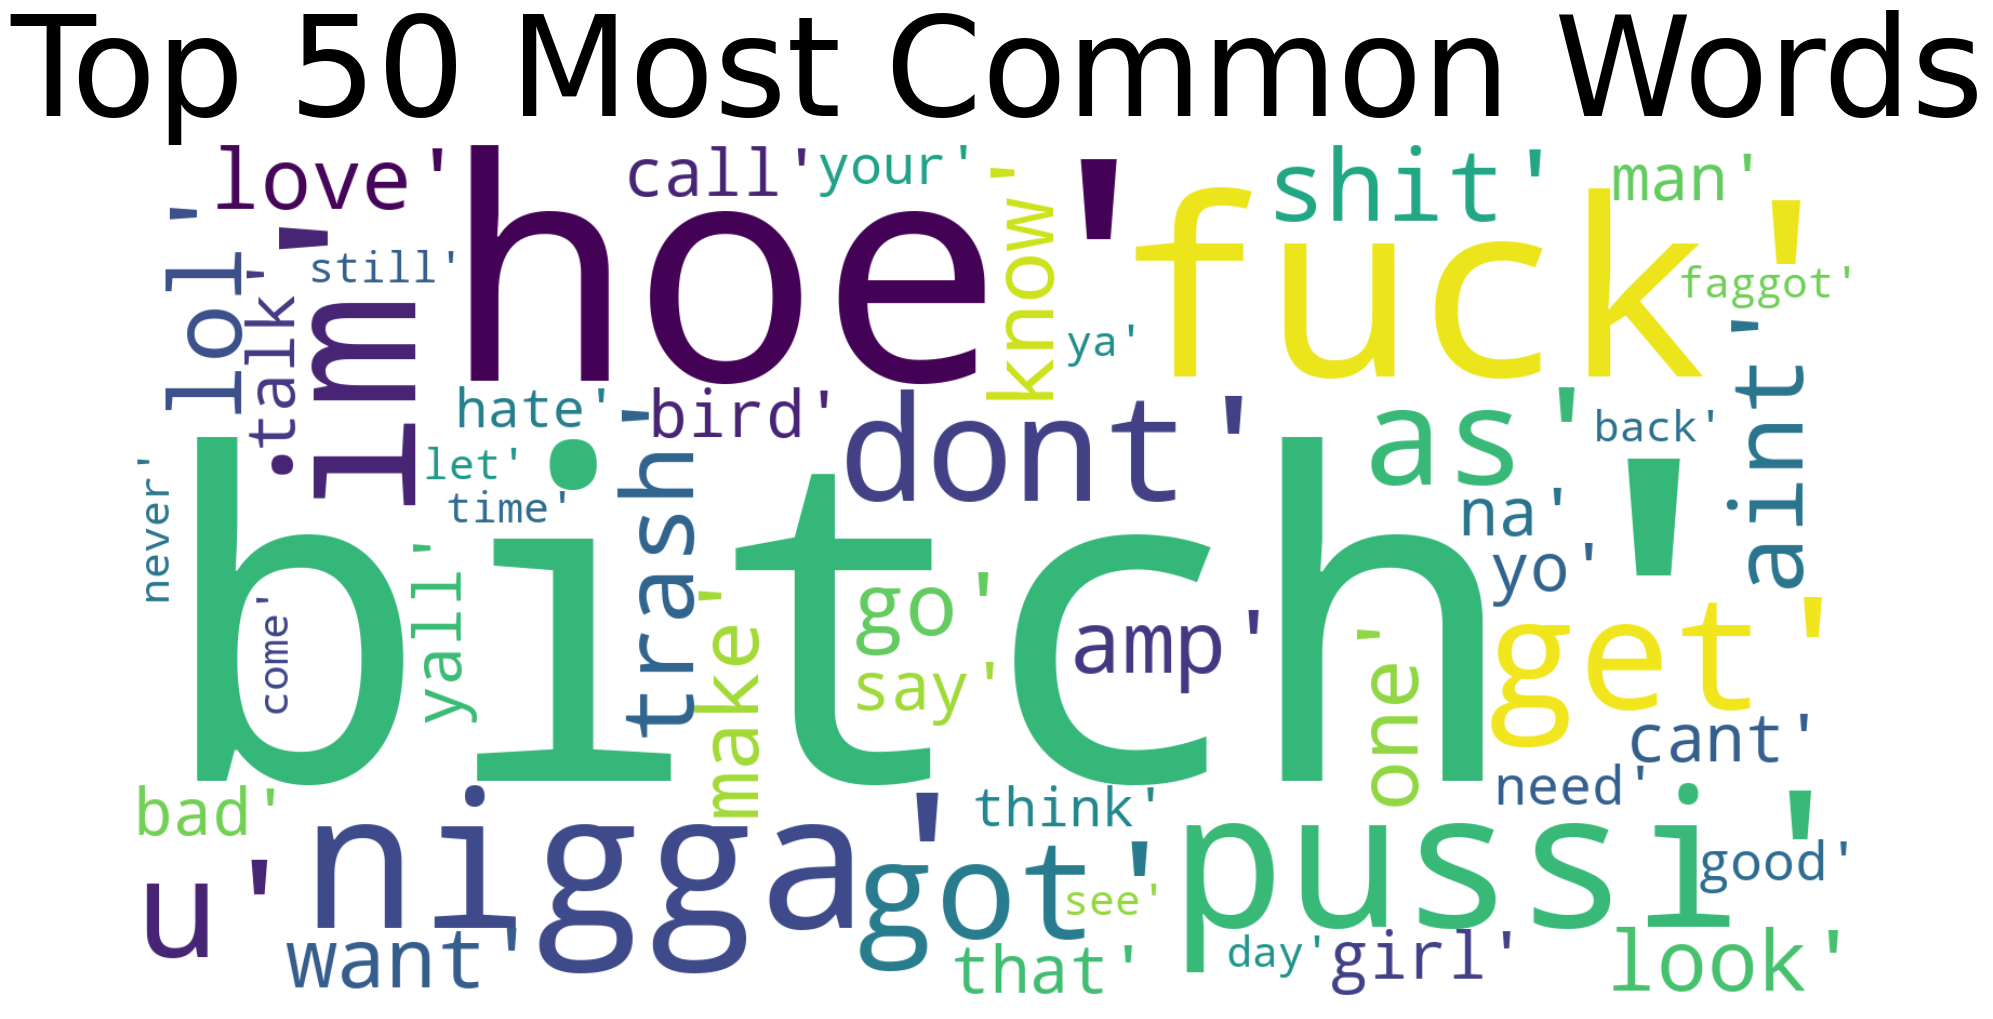

In [39]:
mostcommon = allwords
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 50 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [40]:
tractdf = pd.read_csv("/content/train-TRACTcsv.csv")

FileNotFoundError: ignored

In [ ]:
tractdf.head()

In [ ]:
tractdf.groupby(['label'])['label'].count()

In [ ]:
twe = pd.read_csv("/content/validation-TRACT.tsv",sep = '\t')

twe.groupby(['label'])['label'].count()

In [41]:
df = pd.read_json('/content/drive/MyDrive/NLP RES DATASET/Dataset for Detection of Cyber-Trolls.json', lines= True)
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [42]:
df.shape

(20001, 3)

In [43]:
df['label'] = df['annotation'].apply(lambda x: x.get('label'))
df['label'] = df.label.apply(lambda x: int(x[0]))

df.head()

,content,annotation,extras,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN,1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN,1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN,1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN,1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN,1


In [44]:
cnt = df.groupby(['label'])['label'].count()

<Axes: ylabel='label'>

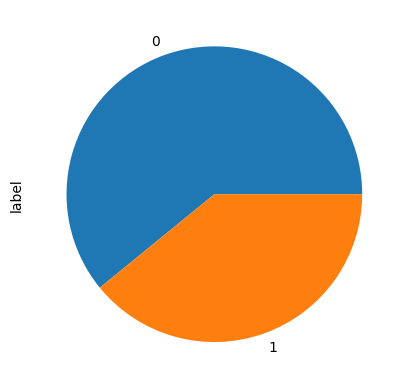

In [45]:
cnt.plot.pie(y='Label')

In [46]:
df = df.drop(['annotation', 'extras'], axis=1)

In [47]:
df["text"] = [clean_tweet(tw) for tw in df["content"]]

<ipython-input-6-abd05791609f>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [48]:
word = freqWordfull(df['text'])
print(word)

allwords = []

for tup in word:
  allwords.append(tup[0])

[('hate', 2894), ('fuck', 2517), ('damn', 2477), ('ass', 1832), ('im', 1647), ('suck', 1637), ('lol', 1441), ('get', 1296), ('dont', 1087), ('u', 973), ('know', 946), ('would', 936), ('go', 879), ('think', 814), ('one', 805), ('love', 783), ('bitch', 752), ('time', 669), ('peopl', 652), ('haha', 644), ('gay', 642), ('that', 628), ('want', 622), ('good', 615), ('make', 587), ('fat', 576), ('say', 551), ('realli', 548), ('well', 545), ('yeah', 533), ('oh', 516), ('thing', 495), ('got', 491), ('ye', 469), ('work', 462), ('much', 448), ('right', 445), ('day', 432), ('need', 432), ('look', 427), ('see', 418), ('man', 417), ('still', 381), ('shit', 371), ('ever', 371), ('3', 366), ('ur', 366), ('thank', 353), ('2', 350), ('use', 343)]


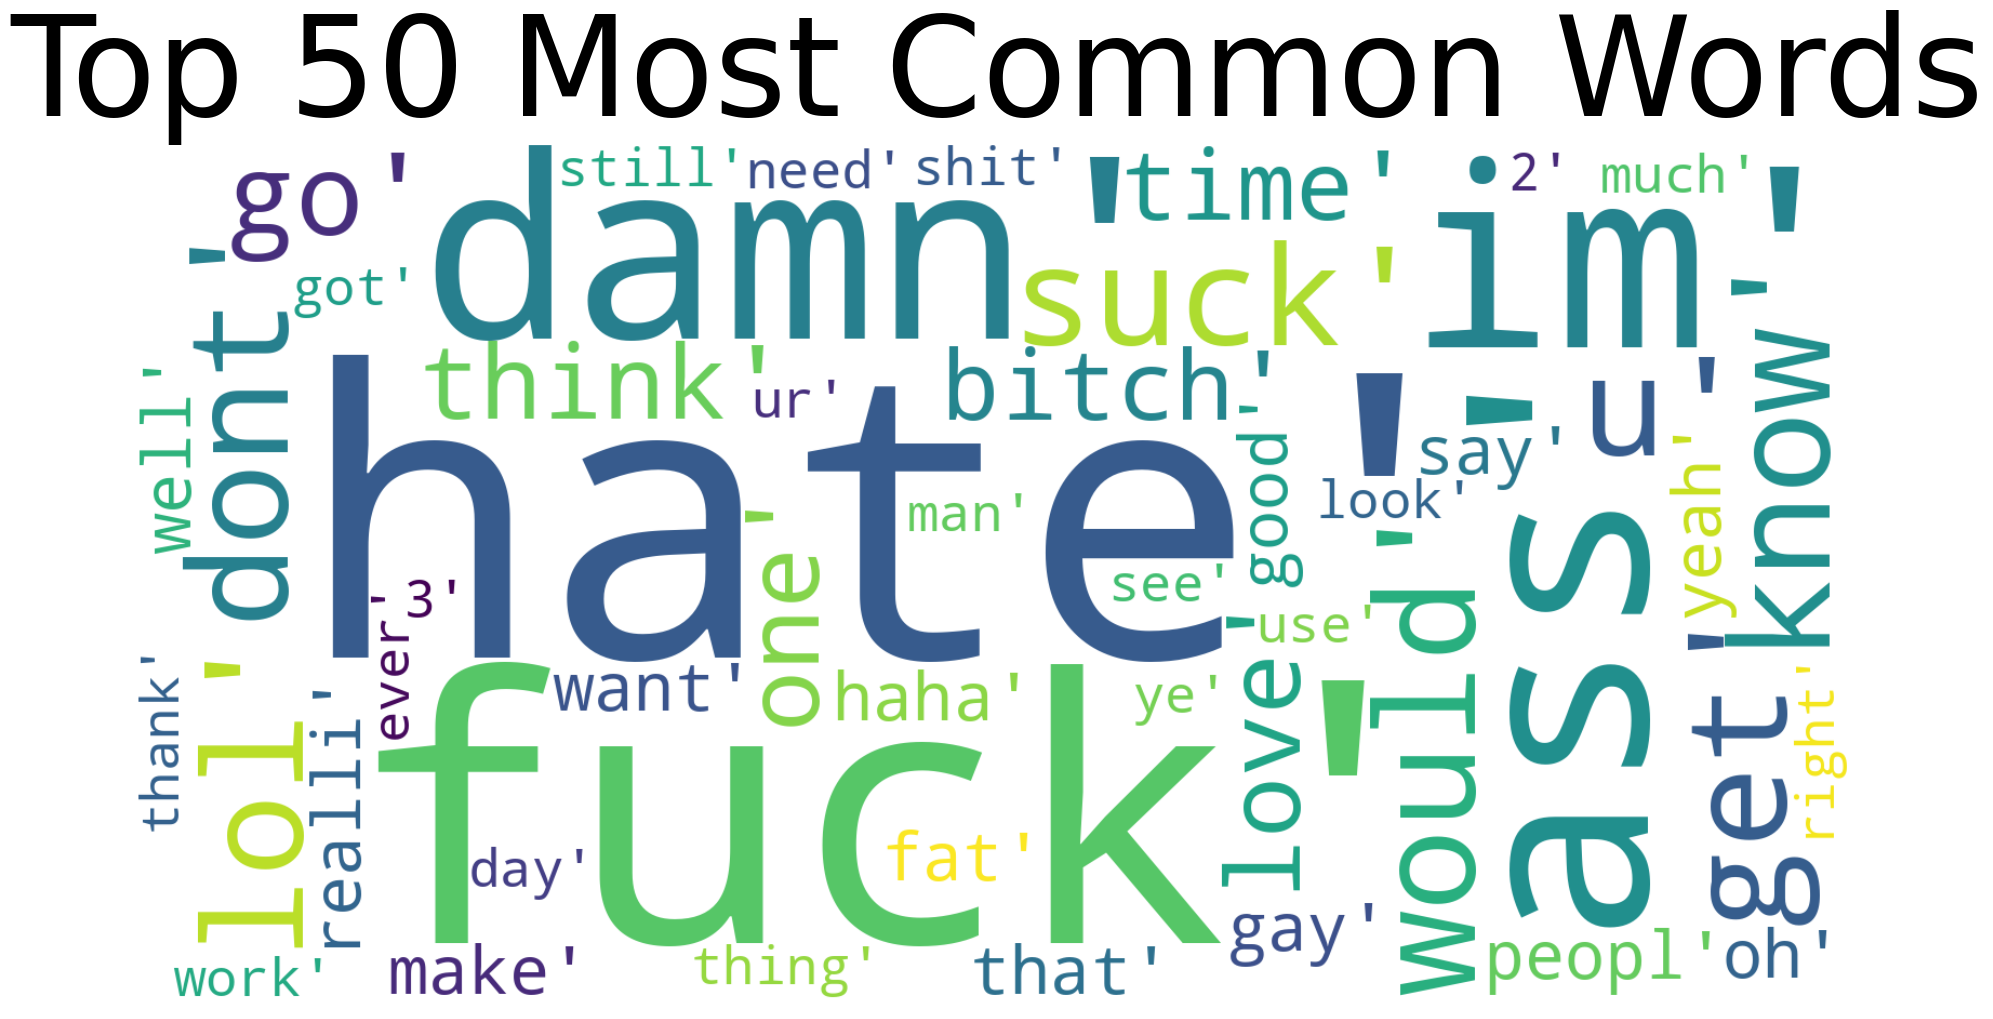

In [49]:
mostcommon = allwords
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 50 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

In [50]:
df["label"][df.label == 0 ] = "NCA"
df["label"][df.label == 1 ] = "CA"

<ipython-input-50-a08618963fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"][df.label == 0 ] = "NCA"


<Axes: ylabel='label'>

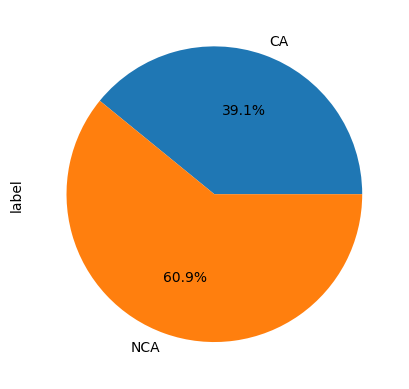

In [52]:
cnt = df.groupby(['label'])['label'].count()
cnt.plot.pie(y='Label',autopct='%1.1f%%')